In [1]:
import logging
import sys
import os


logger = logging.getLogger('eva;_ipynb')
logger.setLevel(logging.DEBUG)


ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
formatter = logging.Formatter('%(levelname)s - %(asctime)s - %(name)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)
logger.debug('--=logging started=--')

In [2]:
IN_COLAB = 'google.colab' in sys.modules
print ('Running in colab:', IN_COLAB)

Running in colab: False


In [3]:
if not IN_COLAB:
  nb_dir = os.path.split(os.getcwd())[0]
  if nb_dir not in sys.path:
      sys.path.append(nb_dir)
 

In [4]:
import analyser.hyperparams
analyser.hyperparams.work_dir


Nemoware Analyser v23.2.7
USING WORKDIR: [/root/artem/work]
 set ENV GPN_WORK_DIR to override
datasets_dir: [/root/artem/work/datasets]
reports_dir: [/root/artem/work/reports]


/root/artem/analyser/analyser/hyperparams.py:15: UserWarning: please set GPN_WORK_DIR environment variable
  warnings.warn('please set GPN_WORK_DIR environment variable')


'/root/artem/work'

# Imports

In [5]:
%matplotlib inline

 
import numpy as np
import pandas as pd

 
from trainsets.retrain_contract_uber_model import UberModelTrainsetManager
from tf_support.super_contract_model import semantic_map_keys_contract



2023-02-11 23:48:48.023032: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
[documents.py:270 -             __init__() ] loading word cases stats model from: /root/artem/analyser/analyser/vocab/word_cases_stats.pickle
[currencies.py:17 -             _env_var() ] Currency-service : define GPN_CURRENCY_USER environment variable! defaulting to None
[currencies.py:17 -             _env_var() ] Currency-service : define GPN_CURRENCY_PASSWORD environment variable! defaulting to None
[currencies.py:17 -             _env_var() ] Currency-service : define GPN_CURRENCY_URL environment variable! defaulting to None
[tools.py:29 -             __init__() ] model_checkpoint_path: /root/artem/analyser/analyser/vocab


HyperParameters.subsidiary_name_match_min_jaro_similarity 0.9649122807017544


In [6]:
from colab_support.renderer import HtmlRenderer
import matplotlib as matplotlib
from IPython.core.display import display, HTML

class DemoRenderer(HtmlRenderer):
  def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None, separator=' '):
    html = self.to_color_text(tokens, weights, colormap, print_debug, _range, separator=separator)
    display(HTML(html))

  def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None, separator=' '):
    return super()._to_color_text(tokens, weights, matplotlib, colormap=colormap, _range=_range, separator=separator)

renderer_ = DemoRenderer()


# renderer_.render_color_text(["слово 1", "слово 2"], np.array( [1, 0]), _range=(0,1))

/tmp/ipykernel_3029202/228146364.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Prepare model


In [7]:
from pathlib import Path
work_dir = Path(analyser.hyperparams.work_dir)
# del work_dir
# # print(work_dir)

training_reports_path = Path(analyser.hyperparams.__file__).parent.parent / 'training_reports/'

In [8]:

umtm = UberModelTrainsetManager (work_dir, training_reports_path)
umtm.load_contract_trainset_meta()
stats = umtm.stats
stats['sample_weight']=-1.0
stats['subject_weight']=-1.0
stats

,source,checksum,version,export_date,len,analyze_date,value,value_log1p,value_span,currency,...,subj_len,headers,url,unseen,score,hash,dups,subject_pos,subject_weight,sample_weight
_id,,,,,,,,,,,,,,,,,,,,,
5ec2b8da665f7603e03b1255,db,3187bfac60ea578221c5d9357756c6c1,1.6.5,2023-02-10 21:11:32.735489,5840.0,2020-05-18 17:16:38.114000+00:00,2.523632e+07,17.043795,5674.0,BRL,...,79.0,4.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5ec2...,False,6.489089e-01,-5.653472e+18,1.0,1444.0,-1.0,-1.0
5edbc62eda3678279fbcadf3,file,027a7c30f74ff8ffe684378e9883dd8e,2.0.2,2023-02-10 21:11:16.082610,1370.0,2020-07-18 20:24:58.934000+00:00,2.400000e+04,10.085851,747.0,RUB,...,106.0,10.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5edb...,False,6.552332e-01,9.154164e+18,1.0,NaN,-1.0,-1.0
5ded4e284ddc27bcf92dd6ce,file,9a44591c17d2b8f34dc8f1c3600c8c3a,1.11.2,2023-02-10 21:11:12.442583,460.0,2020-06-12 21:09:19.574000+00:00,5.900000e+05,13.287880,150.0,RUB,...,30.0,5.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5ded...,False,7.597030e-01,-3.673239e+18,1.0,NaN,-1.0,-1.0
63ce49f8e83d1ee490f3f21c,db,25d924fc09b7291d964f464f9c3ec8c3,23.1.27.1,2023-02-03 16:19:06.576376,8530.0,2023-01-28 09:34:50.691000+00:00,3.000000e+09,21.821878,337.0,RUB,...,53.0,12.0,http://gpn-audit.nemosoft.ru/#/audit/edit/63ce...,False,1.154724e+00,-8.267242e+18,1.0,100.0,-1.0,-1.0
633fd0a69d08c565cfa1232a,db,61cfee32867b371843d1e95a194ea2a6,3.0.0,2023-02-01 17:26:54.225685,5550.0,2022-10-07 10:10:07.028000+00:00,1.000000e+11,25.328436,1505.0,RUB,...,37.0,17.0,http://gpn-audit.nemosoft.ru/#/audit/edit/633f...,False,1.692323e+00,-1.359442e+18,3.0,395.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152d6518558145da68d8759,db,ff661d4dd0ac0eda0163cab2de660193,2.4.6,2023-01-31 18:36:07.160912,2520.0,2021-09-28 11:48:02.901000+00:00,NaN,NaN,NaN,NaN,...,37.0,8.0,http://gpn-audit.nemosoft.ru/#/audit/edit/6152...,True,8.287081e+07,6.916950e+18,3.0,263.0,-1.0,-1.0
6380858b6a07f3e980b2c4c3,db,f9f2ddea91cdfe00b15e149fcf682ed8,3.0.0,2023-01-31 18:36:12.057993,10650.0,2022-11-25 19:27:25.157000+00:00,NaN,NaN,NaN,рублей,...,42.0,14.0,http://gpn-audit.nemosoft.ru/#/audit/edit/6380...,True,8.287081e+07,8.525293e+18,2.0,89.0,-1.0,-1.0
63ce4b0be83d1ee490f4009d,db,a35591663822c05db4729b91ed3a9276,23.01.23,2023-01-31 21:43:37.191817,11690.0,2023-01-26 07:15:10.062000+00:00,NaN,NaN,NaN,NaN,...,188.0,19.0,http://gpn-audit.nemosoft.ru/#/audit/edit/63ce...,True,8.322656e+07,-3.582375e+18,1.0,2405.0,-1.0,-1.0


# look into trainset (take a sample)

In [9]:
from tf_support.super_contract_model import  validate_datapoint

stats['valid'] = True
stats['error'] = ''

for i in stats.index:
  
  try:
    validate_datapoint(str(i), stats)

  except Exception as e:
    logger.error(e)

    stats.at[i, 'valid'] = False
    stats.at[i, 'error'] = str(e)
    
stats

ERROR - 2023-02-11 23:48:57,713 - eva;_ipynb - [Errno 2] No such file or directory: '/root/artem/work/datasets/5fbbad2ca2b4551c06107864-datapoint-embeddings.npy'


,source,checksum,version,export_date,len,analyze_date,value,value_log1p,value_span,currency,...,headers,url,unseen,score,hash,dups,subject_pos,subject_weight,sample_weight,error
_id,,,,,,,,,,,,,,,,,,,,,
5ec2b8da665f7603e03b1255,db,3187bfac60ea578221c5d9357756c6c1,1.6.5,2023-02-10 21:11:32.735489,5840.0,2020-05-18 17:16:38.114000+00:00,2.523632e+07,17.043795,5674.0,BRL,...,4.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5ec2...,False,6.489089e-01,-5.653472e+18,1.0,1444.0,-1.0,-1.0,None
5edbc62eda3678279fbcadf3,file,027a7c30f74ff8ffe684378e9883dd8e,2.0.2,2023-02-10 21:11:16.082610,1370.0,2020-07-18 20:24:58.934000+00:00,2.400000e+04,10.085851,747.0,RUB,...,10.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5edb...,False,6.552332e-01,9.154164e+18,1.0,NaN,-1.0,-1.0,None
5ded4e284ddc27bcf92dd6ce,file,9a44591c17d2b8f34dc8f1c3600c8c3a,1.11.2,2023-02-10 21:11:12.442583,460.0,2020-06-12 21:09:19.574000+00:00,5.900000e+05,13.287880,150.0,RUB,...,5.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5ded...,False,7.597030e-01,-3.673239e+18,1.0,NaN,-1.0,-1.0,None
63ce49f8e83d1ee490f3f21c,db,25d924fc09b7291d964f464f9c3ec8c3,23.1.27.1,2023-02-03 16:19:06.576376,8530.0,2023-01-28 09:34:50.691000+00:00,3.000000e+09,21.821878,337.0,RUB,...,12.0,http://gpn-audit.nemosoft.ru/#/audit/edit/63ce...,False,1.154724e+00,-8.267242e+18,1.0,100.0,-1.0,-1.0,None
633fd0a69d08c565cfa1232a,db,61cfee32867b371843d1e95a194ea2a6,3.0.0,2023-02-01 17:26:54.225685,5550.0,2022-10-07 10:10:07.028000+00:00,1.000000e+11,25.328436,1505.0,RUB,...,17.0,http://gpn-audit.nemosoft.ru/#/audit/edit/633f...,False,1.692323e+00,-1.359442e+18,3.0,395.0,-1.0,-1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152d6518558145da68d8759,db,ff661d4dd0ac0eda0163cab2de660193,2.4.6,2023-01-31 18:36:07.160912,2520.0,2021-09-28 11:48:02.901000+00:00,NaN,NaN,NaN,NaN,...,8.0,http://gpn-audit.nemosoft.ru/#/audit/edit/6152...,True,8.287081e+07,6.916950e+18,3.0,263.0,-1.0,-1.0,None
6380858b6a07f3e980b2c4c3,db,f9f2ddea91cdfe00b15e149fcf682ed8,3.0.0,2023-01-31 18:36:12.057993,10650.0,2022-11-25 19:27:25.157000+00:00,NaN,NaN,NaN,рублей,...,14.0,http://gpn-audit.nemosoft.ru/#/audit/edit/6380...,True,8.287081e+07,8.525293e+18,2.0,89.0,-1.0,-1.0,None
63ce4b0be83d1ee490f4009d,db,a35591663822c05db4729b91ed3a9276,23.01.23,2023-01-31 21:43:37.191817,11690.0,2023-01-26 07:15:10.062000+00:00,NaN,NaN,NaN,NaN,...,19.0,http://gpn-audit.nemosoft.ru/#/audit/edit/63ce...,True,8.322656e+07,-3.582375e+18,1.0,2405.0,-1.0,-1.0,None


In [10]:
stats_valid = stats[stats['valid']]
# stats_valid = stats_valid[stats_valid.source=='file']
len(stats_valid)

2794

In [11]:
import json
import re
from bson import json_util

fn = work_dir / 'documents.json'
with open(fn) as file:
    file_data = json.load(file, object_hook=json_util.object_hook)    
    print(f'total docs in {fn} is {len(file_data)}')    
    

total docs in /root/artem/work/documents.json is 622


In [12]:
from pandas import DataFrame


def validate_datapoint(id: str, meta: DataFrame):
  try:
    (emb, tok_f), (sm, subj), (sample_weight, subject_weight) = make_xyw(id, meta)
    if sm.shape[1] != len(semantic_map_keys_contract):
      mxs = f'semantic map shape is {sm.shape[1]}, expected is {len(semantic_map_keys_contract)} source={meta.at[id, "source"]}'
      raise ValueError(mxs)

  except Exception as e:
    raise e
    
# validate_datapoint('5deba9034ddc27bcf92dd383', stats)

In [13]:
from analyser.persistence import DbJsonDoc
from tf_support.super_contract_model import make_xyw

import traceback

docs = {}
errors = 0
for fd in file_data:
    try:
      validate_datapoint(str(fd['_id']), stats)
      docs [fd['_id']] =  DbJsonDoc(fd)
#       print (fd['_id'])
    except KeyError as e:
      errors += 1
      logger.error(f'No key in stats: {str(e)}')
    except Exception as e:
      errors += 1
      
      logger.error(f'{type(e)}, {str(e)}')
      traceback.print_exc()

print('errors count:', errors)
print(f'total docs in {fn} is {len(list(docs.values()))}')   

ERROR - 2023-02-11 23:49:02,594 - eva;_ipynb - No key in stats: '5deba9034ddc27bcf92dd383'
ERROR - 2023-02-11 23:49:02,602 - eva;_ipynb - No key in stats: '5dece9be4ddc27bcf92dd410'
ERROR - 2023-02-11 23:49:02,604 - eva;_ipynb - No key in stats: '5dece9be4ddc27bcf92dd411'
ERROR - 2023-02-11 23:49:02,605 - eva;_ipynb - No key in stats: '5dece9bf4ddc27bcf92dd417'
ERROR - 2023-02-11 23:49:02,608 - eva;_ipynb - No key in stats: '5dece9bf4ddc27bcf92dd419'
ERROR - 2023-02-11 23:49:02,617 - eva;_ipynb - No key in stats: '5dece9c14ddc27bcf92dd42b'
ERROR - 2023-02-11 23:49:02,659 - eva;_ipynb - No key in stats: '5ded004f4ddc27bcf92dd490'
ERROR - 2023-02-11 23:49:02,663 - eva;_ipynb - No key in stats: '5ded06ef4ddc27bcf92dd4aa'
ERROR - 2023-02-11 23:49:02,664 - eva;_ipynb - No key in stats: '5ded06f04ddc27bcf92dd4b0'
ERROR - 2023-02-11 23:49:02,683 - eva;_ipynb - No key in stats: '5ded07184ddc27bcf92dd4eb'
ERROR - 2023-02-11 23:49:02,685 - eva;_ipynb - No key in stats: '5ded07184ddc27bcf92dd4ed'

errors count: 81
total docs in /root/artem/work/documents.json is 541


## Get sample doc

In [14]:
_DEBUG = True

if _DEBUG:
    a_doc_from_json = list(docs.values())[20]


print(a_doc_from_json.get_tokens_map_unchaged().text[:2300])

ДОГОВОР № __________________ на выполнение научно-исследовательских работ по теме «Анализ исторических данных по ледовым и гидрометеорологическим условиям на акватории Хейсовского лицензионного участка в Баренцевом море»
г. Санкт-Петербург    «____» ___________ 2016 год.
Общество с ограниченной ответственностью «Газпромнефть-Сахалин» (ООО «Газпромнефть-Сахалин»), в лице Генерального директора Александра Николаевича Коробкова, действующего на основании Устава, с одной стороны, именуемое в дальнейшем «Заказчик», и
Федеральное государственное бюджетное учреждение «Арктический и антарктический научно-исследовательский институт» (ФГБУ «ААНИИ»), в лице заместителя директора Данилова Александра Ивановича, действующего на основании доверенности №03-08 от «11» января 2016 год, с другой стороны, именуемое в дальнейшем «Исполнитель»,
в дальнейшем совместно именуемые «Стороны», а по отдельности – «Сторона», заключили настоящий Договор на выполнение научно-исследовательских работ по теме «Анализ ис

In [15]:
# a_doc_from_json.parse

In [16]:
a_doc_from_json.get_attributes_tree()

{'orgs': [{'type': {'span': [38, 42],
    'span_map': 'words',
    'confidence': 0.981,
    'value': 'Общество с ограниченной ответственностью'},
   'name': {'span': [43, 44],
    'span_map': 'words',
    'confidence': 0.9785,
    'value': 'Газпромнефть-Сахалин'},
   'alias': {'span': [73, 74],
    'span_map': 'words',
    'confidence': 0.9635,
    'value': 'Заказчик'},
   'alt_name': {'span': [45, 51],
    'span_map': 'words',
    'confidence': 0.9775,
    'value': '(ООО «Газпромнефть-Сахалин»)'}},
  {'type': {'span': [78, 82],
    'span_map': 'words',
    'confidence': 0.961,
    'value': 'Федеральное государственное бюджетное учреждение'},
   'name': {'span': [83, 88],
    'span_map': 'words',
    'confidence': 0.9585,
    'value': 'Арктический и антарктический научно-исследовательский институт'},
   'alias': {'span': [125, 126],
    'span_map': 'words',
    'confidence': 0,
    'value': 'Исполнитель'},
   'alt_name': {'span': [89, 95],
    'span_map': 'words',
    'confidence': 0.9

SAMPLE_DOC_ID 5ded004f4ddc27bcf92dd493
semantic map shape is: (4925, 30)


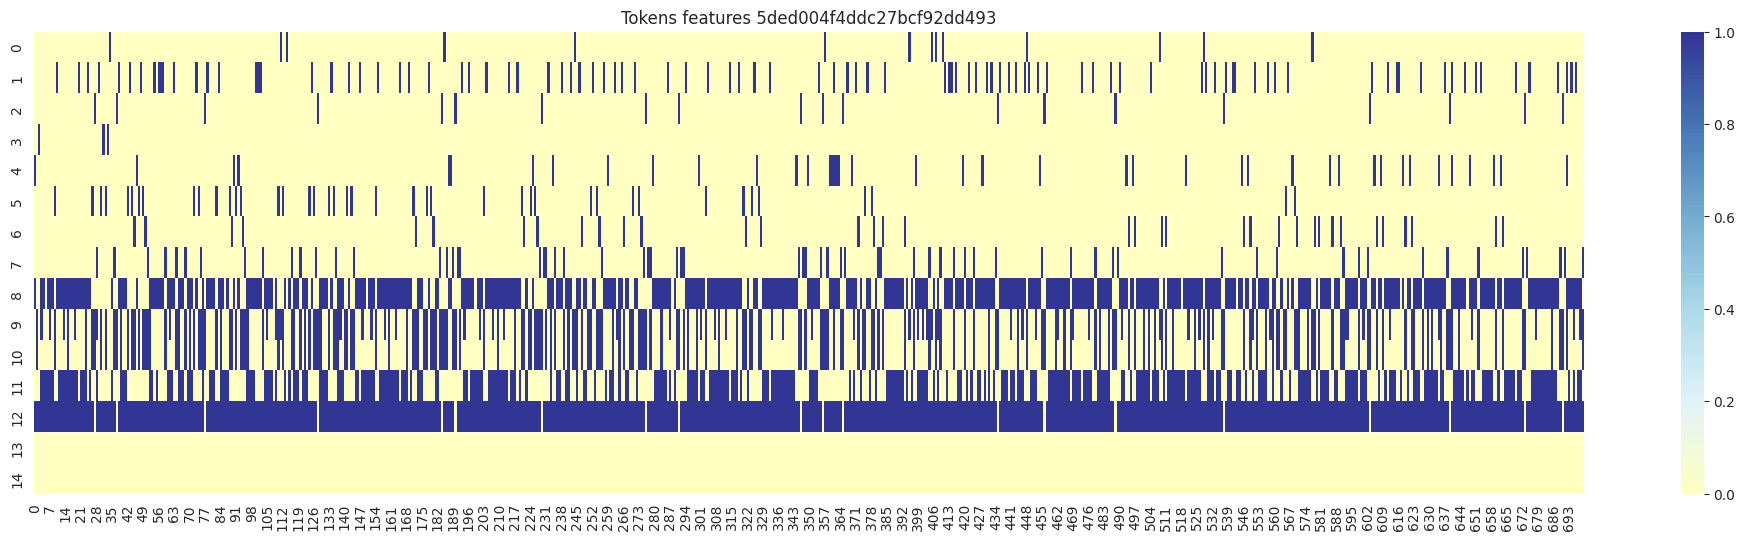

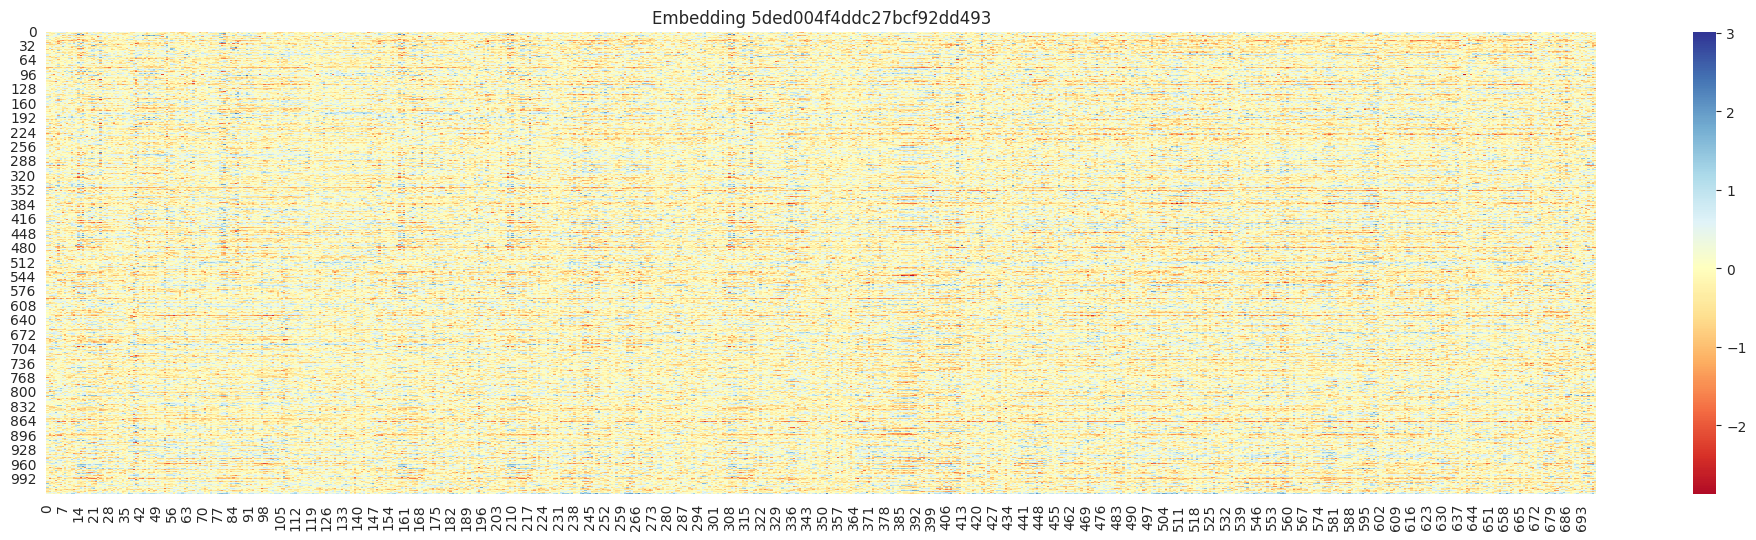

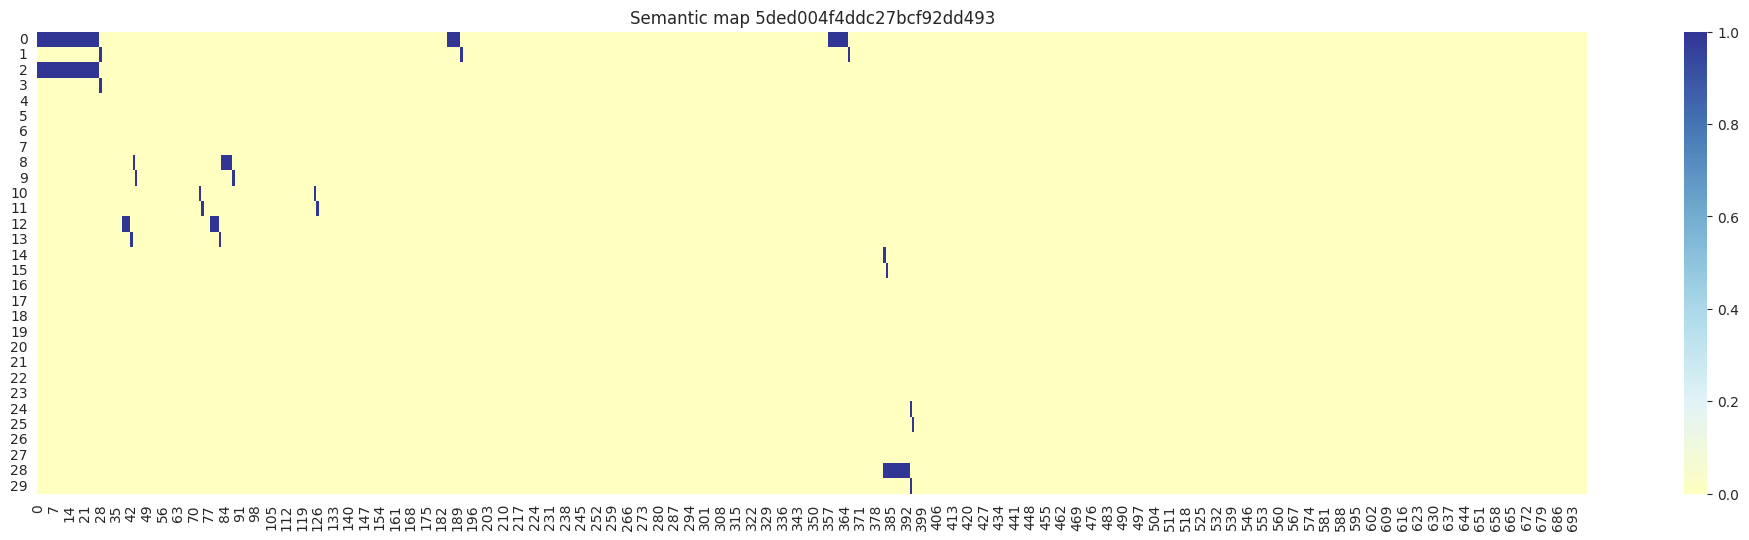

In [17]:
%matplotlib inline
from colab_support.renderer import plot_embedding, plot_cm
from tf_support.super_contract_model import make_xyw

SAMPLE_DOC_ID = str(a_doc_from_json.get_id())# stats_valid.index[0]


# SAMPLE_DOC_ID = '5fdb2145542ce403c92b460c'
# del a_doc_from_json

print('SAMPLE_DOC_ID', SAMPLE_DOC_ID)

(emb, tok_f), (sm, subj), (sample_weight, subject_weight) = make_xyw(SAMPLE_DOC_ID, stats)
 
    
print('semantic map shape is:', sm.shape)
_crop = 700
plot_embedding(tok_f[:_crop], title=f'Tokens features {SAMPLE_DOC_ID}') 
plot_embedding(emb[:_crop], title=f'Embedding {SAMPLE_DOC_ID}') 
plot_embedding(sm[:_crop], title=f'Semantic map {SAMPLE_DOC_ID}')


# Models 🦖

## make_att_model


In [18]:
from tf_support.super_contract_model import make_att_model
 
model_factory_fn = make_att_model

In [19]:
training_reports_path = Path(analyser.hyperparams.__file__).parent.parent / 'training_reports/'

from tf_support.tools import KerasTrainingContext
from sklearn.model_selection import train_test_split

BATCH_SIZE = 2

_train, _test = train_test_split(stats_valid, test_size=0.2, stratify=stats_valid[['subject']])

train_indices = list(_train.index)
test_indices = list(_test.index)

ctx = KerasTrainingContext(umtm.work_dir, session_index=21)
ctx.EVALUATE_ONLY = True
ctx.set_batch_size_and_trainset_size(BATCH_SIZE, 
                                     len(test_indices), 
                                     4 * len(train_indices))


# model_factory_fn = uber_detection_model_005_1_1



# weights = Path(models_path) / f"{model_factory_fn.__name__}-{keras.__version__}.h5"
weights = training_reports_path / f'{model_factory_fn.__name__}.h5'
if weights.is_file():
    print (f'LOADING: {model_factory_fn} -- {weights}')
    
umodel = ctx.init_model(model_factory_fn, trained=True, trainable=True, weights=weights)
umodel.trainable = False
umodel.summary()

[tools.py:29 -             __init__() ] model_checkpoint_path: /root/artem/work
2023-02-11 23:49:10.003251: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1


batch_size:	2
train_samples:	8940
test_samples:	559
steps_per_epoch:	4470
validation_steps:	2235
LOADING: <function make_att_model at 0x7f6fb28f5820> -- /root/artem/analyser/training_reports/make_att_model.h5


2023-02-11 23:49:10.502841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 23:49:10.503496: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: A100-PCIE-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-02-11 23:49:10.503517: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-02-11 23:49:10.503549: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-02-11 23:49:10.503566: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-02-11 23:49:10.504101: I tensorflow/stream_executor/platform

Model: "make_att_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
token_features (InputLayer)     [(None, None, 15)]   0                                            
__________________________________________________________________________________________________
input_text_emb (InputLayer)     [(None, None, 1024)] 0                                            
__________________________________________________________________________________________________
bn2 (BatchNormalization)        (None, None, 15)     60          token_features[0][0]             
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, None, 1039)   0           input_text_emb[0][0]             
                                                                 bn2[0][0]           

# Evaluate models

In [20]:
# semantic_map, subj_1hot = nn_predict(self.subject_prediction_model, _contract_cut)
# tok_f.shape

2023-02-11 23:49:11.507078: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-11 23:49:11.525955: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3699850000 Hz


5ded004f4ddc27bcf92dd493


2023-02-11 23:49:12.009888: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-02-11 23:49:12.549527: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-02-11 23:49:12.549571: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-11 23:49:12.569088: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-02-11 23:49:12.663636: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8500


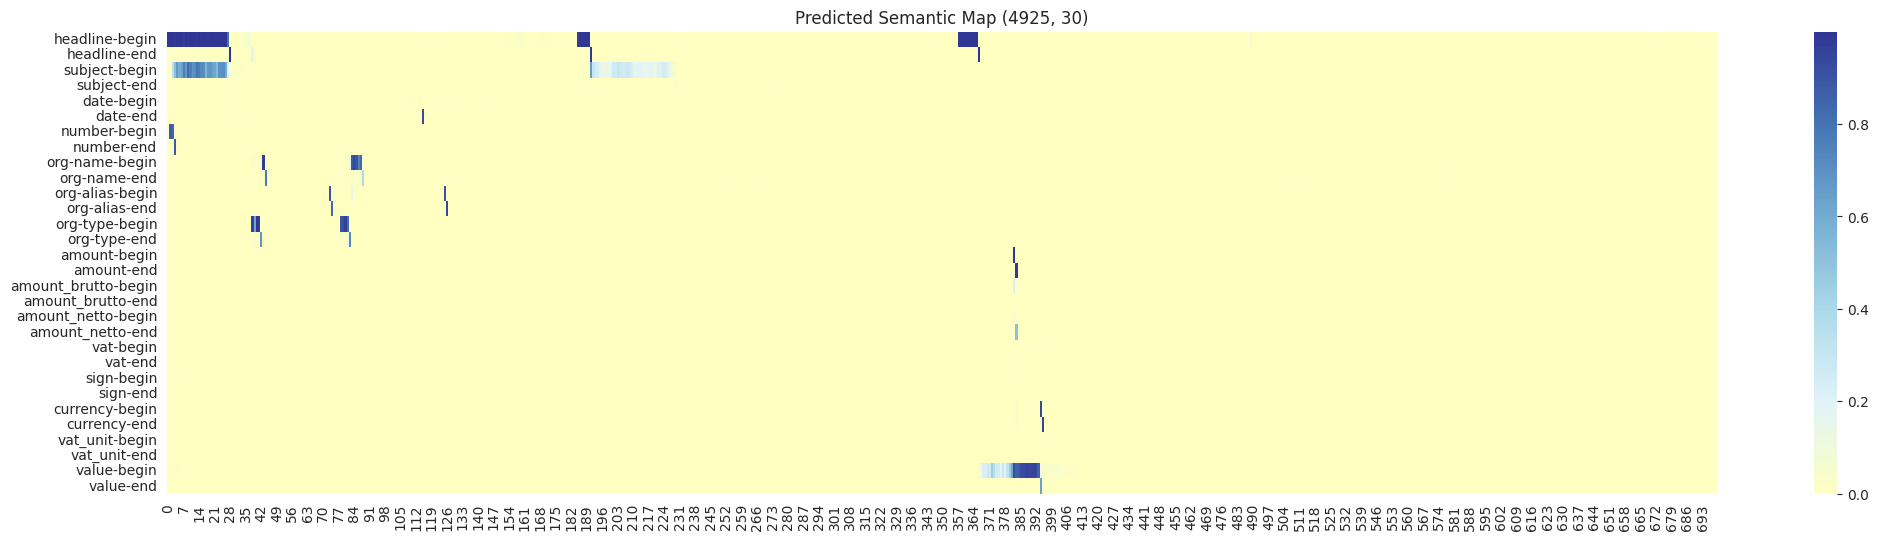

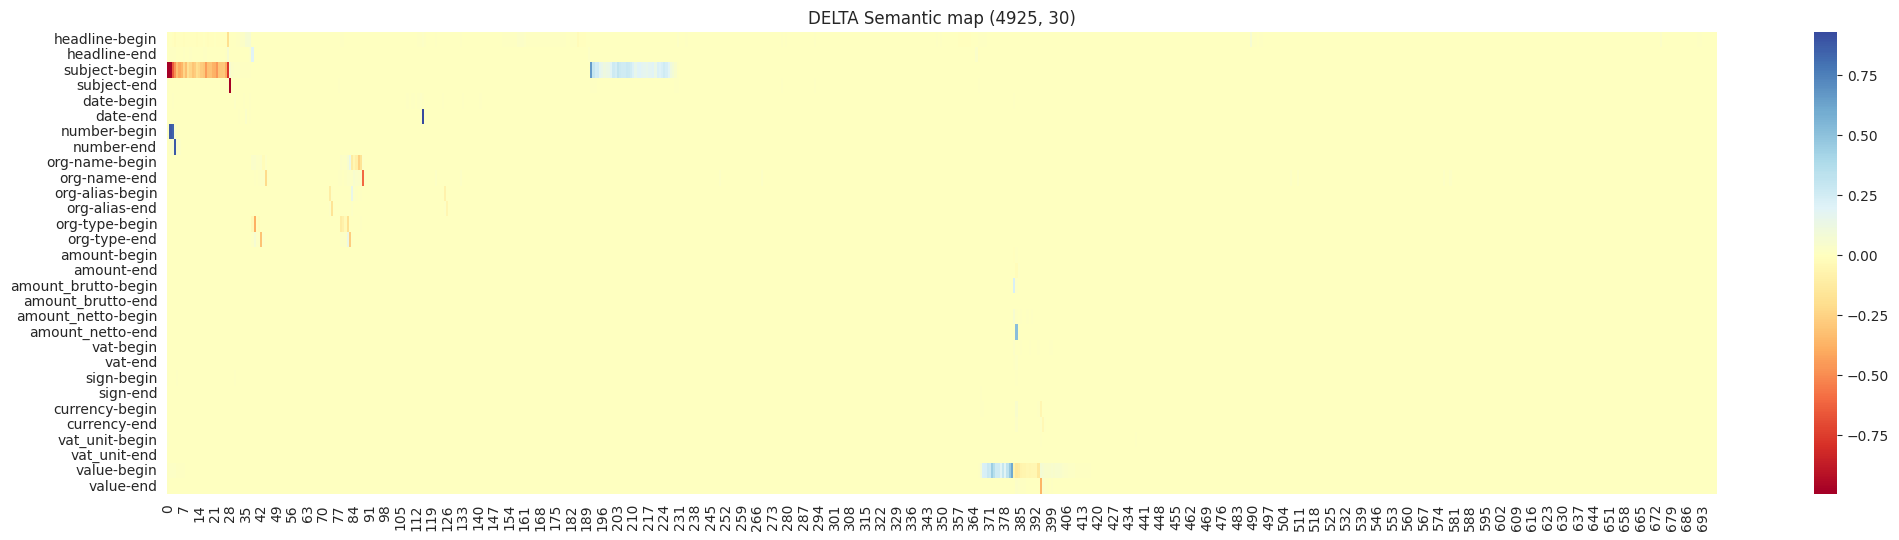

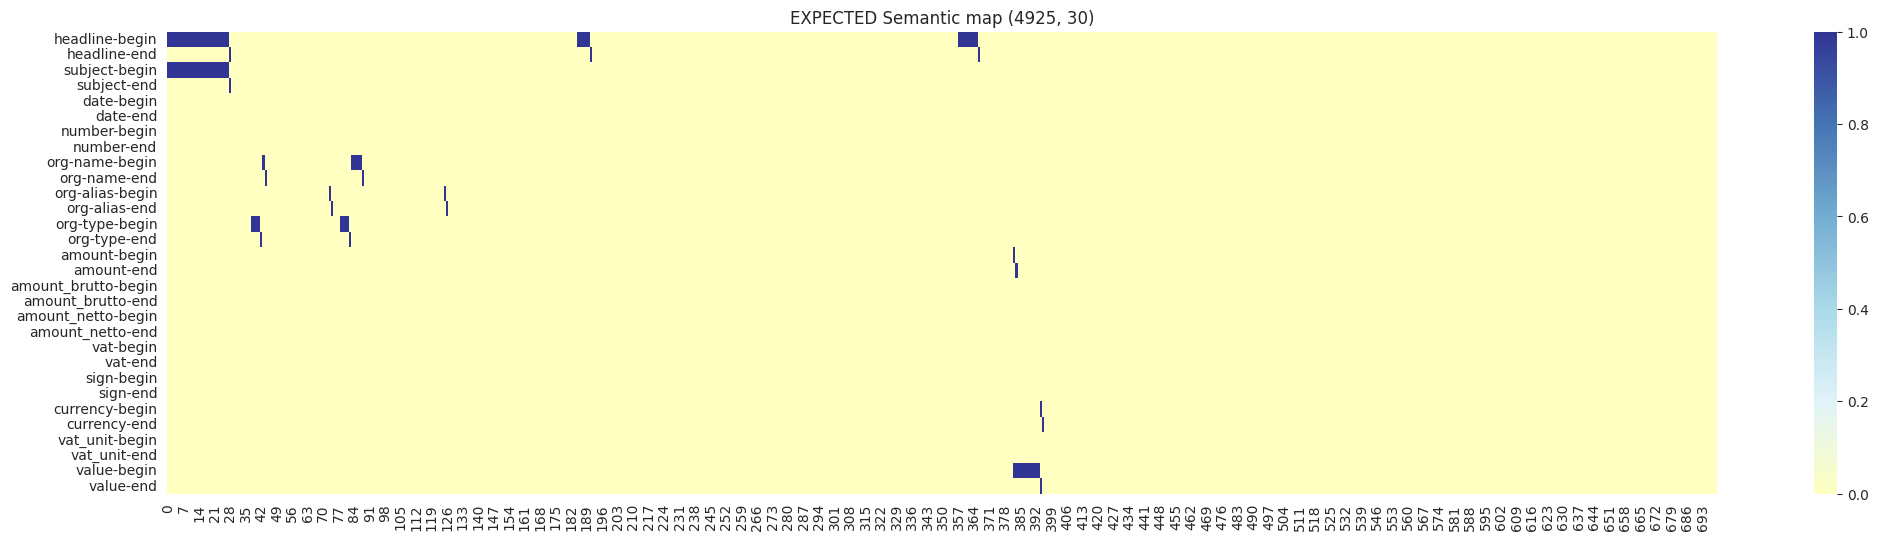

In [21]:
# sample_index = umtm.stats [umtm.stats['value']>0].index[2]
print(SAMPLE_DOC_ID)


prediction = umodel.predict(x=[np.expand_dims(emb, axis=0), np.expand_dims(tok_f, axis=0)], batch_size=1)



# x, y, _ = (emb, tok_f), (sm, subj), (sample_weight, subject_weight)# = umtm.make_xyw(SAMPLE_DOC_ID)

# x, y, _ = umtm.make_xyw(sample_index)

# prediction = umodel.predict(x=[np.expand_dims(x[0], axis=0), np.expand_dims(x[1], axis=0)], batch_size=1)



tagsmap = pd.DataFrame(prediction[0][0], columns=semantic_map_keys_contract)
tagsmap_e = pd.DataFrame(sm, columns=semantic_map_keys_contract)
delta = tagsmap - tagsmap_e 
# .T
plot_embedding(tagsmap[:_crop], f'Predicted Semantic Map {tagsmap.shape}')
plot_embedding(delta[:_crop], title=f'DELTA Semantic map {tagsmap_e.shape}')
plot_embedding(tagsmap_e[:_crop], title=f'EXPECTED Semantic map {tagsmap_e.shape}')

In [22]:
delta.abs().sum().sum()

53.153782271576034

In [23]:
delta.abs().sum().sum() / tagsmap.sum().sum()

0.23890013708265312

In [24]:
av = tagsmap.sum(axis=1) #tagsmap['amount-begin'] + tagsmap['vat-begin'] + tagsmap['number-begin'] + tagsmap['org-name-begin']

# av = tagsmap.sum(axis=1)
renderer_.render_color_text(a_doc_from_json.get_tokens_map_unchaged().tokens[:1600], av[:1600])

In [25]:
from analyser.documents import TextMap
from analyser.ml_tools import SemanticTag

 

## Getting tag values from inferred semantic map

In [26]:
from analyser.contract_parser import nn_find_org_names, nn_get_subject, nn_get_contract_number, nn_get_contract_date
from analyser.parsing import AuditContext

ac = AuditContext()

In [27]:
# del nn_get_tag_values
from analyser.contract_parser import nn_get_tag_values

# def nn_get_tag_values(tag_name: str,
#                       textmap: TextMap,
#                       tagsmap: pd.DataFrame,
#                       max_tokens=200,
#                       threshold=0.3,  # TODO: what's that
#                       limit=1,
#                       return_single=False) -> (SemanticTag or None) or [SemanticTag]:
 
#   attention = tagsmap[tag_name + '-begin'].values.copy()

#   threshold = max(attention.max() * 0.8, 0.01)
#   # attention[attention<threshold]=0.
#   # attention[attention>=threshold]=1.

#   #     print(f'threshold={threshold} attention.max()={attention.max()}')

#   last_taken = False
#   sequences = []
#   seq = None

#   # collecting hits--------
#   for i, v in enumerate(attention):
#     if v >= threshold:
#       #             print ('---',i,f'{v:.2}', a_doc_from_json.get_tokens_map_unchaged()[i])
#       if seq is None:
#         seq = []
#         sequences.append(seq)
#       seq.append(i)
#       last_taken = True
#     else:
#       if last_taken:
#         seq = None
#         last_taken = False

#   # making spans  --------  
#   tags = []
#   for s in sequences:
#     span = [min(s), max(s) + 1]
#     if span[1] - span[0] > max_tokens:
#       span[1] = span[0] + max_tokens
#     quote = textmap.text_range(span)
#     tag = SemanticTag(tag_name, quote, span)
#     tag.confidence = attention[span[0]:span[1]].mean()

#     #         print(span, quote, tag)
#     tags.append(tag)

#   # sorting spans--------
#   tags = sorted(tags, key=lambda x: -x.confidence)
#   tags = tags[0:limit]

#   if return_single:
#     if len(tags) > 0:
#       return tags[0]
#     else:
#       return None

#   tags = sorted(tags, key=lambda x: x.span[0])

#   return tags

#### Orgs

In [28]:
cas = nn_find_org_names(a_doc_from_json.get_tokens_map_unchaged(), tagsmap, ac)
print(cas[0].name)
print(cas[0].type)
print(cas[0].alias)
print()
print(cas[1].name)
print(cas[1].type)
print(cas[1].alias)

SemanticTag: org-name (43, 44) Газпромнефть-Сахалин 0.9766918420791626
SemanticTag: org-type (38, 39) Общество 0.4776291251182556
SemanticTag: org-alias (73, 74) Заказчик 0.8913689255714417

SemanticTag: org-name (83, 86) Арктический и антарктический 0.9112253189086914
SemanticTag: org-type (40, 42) ограниченной ответственностью 0.4930652678012848
SemanticTag: org-alias (125, 126) Исполнитель 0.9209825992584229


In [29]:
# tag = nn_get_tag_values('org-type',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=12, threshold=0.3, limit=2)
# for t in tag:
#   print("-"*100)
#   print(t)

In [30]:
# tag = nn_get_tag_values('org-name',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=12, threshold=0.5, limit=2)
# for t in tag:
#   print("-"*100)
#   print(t)

In [31]:
# tag = nn_get_tag_values('org-alias',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=4, threshold=0.2, limit=2)


# for t in tag:
#   print("-"*100)
#   print(t)

#### Date/number

In [32]:
# tag = nn_get_tag_values('date',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=6, threshold=0.3, limit=1, return_single=True)
# print(tag)

In [33]:
# tag = nn_get_tag_values('number',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=5, threshold=0.3, limit=1, return_single=True)
# print(tag)

In [34]:
date_tag = nn_get_contract_number(a_doc_from_json.get_tokens_map_unchaged(), tagsmap) 
number_tag = nn_get_contract_date(a_doc_from_json.get_tokens_map_unchaged(), tagsmap)
print( date_tag)
print( number_tag )

SemanticTag: number [2, 3] __________________ 0.8638128638267517
None


#### Amount

In [35]:
textmap = a_doc_from_json.get_tokens_map_unchaged()

In [36]:
from pandas import DataFrame
from analyser.schemas import ContractPrice, merge_spans
from analyser.legal_docs import find_value_sign
from analyser.transaction_values import ValueSpansFinder
from analyser.text_tools import to_float
from analyser.contract_parser import nn_find_contract_value

#---
cps = nn_find_contract_value(textmap, tagsmap)
if cps:
  print(str(cps[0].get_span()))
  for k in cps[0].list_children():
    print(str(k))

  print()
  print()

  print('brutto', str(cps[0].amount_brutto))
  print('netto', str(cps[0].amount_netto))
  print('amount', str(cps[0].amount))
  print('vat', str(cps[0].vat))
else:
  print('nothing found')

[contract_parser.py:426 - nn_find_contract_value() ] vat is None


(382, 395)
None
SemanticTag: currency (394, 395) RUB 0.9384435415267944
None
SemanticTag: amount (382, 383) 2155143.36 1.0
None
None
None


brutto None
netto SemanticTag: amount (382, 383) 2155143.36 1.0
amount None
vat None


In [37]:
thresholds = dict(tagsmap.max()*.8)
thresholds

{'headline-begin': 0.7999469,
 'headline-end': 0.79993165,
 'subject-begin': 0.6595877,
 'subject-end': 0.009321535,
 'date-begin': 0.010743371,
 'date-end': 0.74511814,
 'number-begin': 0.70332325,
 'number-end': 0.7088199,
 'org-name-begin': 0.7813535,
 'org-name-end': 0.62437344,
 'org-alias-begin': 0.73678607,
 'org-alias-end': 0.7525877,
 'org-type-begin': 0.7947156,
 'org-type-end': 0.57858104,
 'amount-begin': 0.79746455,
 'amount-end': 0.7833652,
 'amount_brutto-begin': 0.18341066,
 'amount_brutto-end': 0.0024260562,
 'amount_netto-begin': 0.04374765,
 'amount_netto-end': 0.4084495,
 'vat-begin': 0.02039287,
 'vat-end': 0.012596426,
 'sign-begin': 0.009011729,
 'sign-end': 0.0046337782,
 'currency-begin': 0.75075483,
 'currency-end': 0.76245147,
 'vat_unit-begin': 0.010506372,
 'vat_unit-end': 0.0013460614,
 'value-begin': 0.7615997,
 'value-end': 0.5084526}

In [38]:
# tags = []

# # tags.append()
# tags.append(nn_get_tag_value('sign', textmap,          tagsmap, max_tokens=10, threshold=0.4, limit=1))
# tags.append(nn_get_tag_value('currency',textmap,       tagsmap, max_tokens=4, threshold=0.4, limit=1))
# tags.append(nn_get_tag_value('amount_brutto', textmap, tagsmap, max_tokens=4, threshold=0.4, limit=1))
# tags.append(nn_get_tag_value('amount_netto', textmap,  tagsmap, max_tokens=4, threshold=0.4, limit=1))
# tags.append(nn_get_tag_value('value', textmap,         tagsmap, max_tokens=40, threshold=0.02, limit=1))
# for tag in tags:
#   print("-"*100)
#   for t in tag:
#     print(t)

#### Subject

In [39]:
import matplotlib.pyplot as plt


    
    
# print ('---', a_doc_from_json.get_tokens_map_unchaged()[spans[0][0][0]:spans[0][0][1]])

tags = nn_get_tag_values('date',
                      a_doc_from_json.get_tokens_map_unchaged(),
                      tagsmap,
                      max_tokens=200,
                      threshold=None, #TODO: what's that
                      limit=2)
# print(tags)
for t in tags:
    print(t)                  
# plt.figure(figsize=(20,5))
# plt.plot(attention[:500])
 


In [40]:
subject_tag = nn_get_tag_values('subject',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=200, threshold=0.02, limit=1, return_single=True)

print(subject_tag)

SemanticTag: subject (7, 17) по теме «Анализ исторических данных по ледовым и гидрометеорологическим 0.7426055669784546


### Draw tags

In [41]:
tags_hl = np.zeros(len(textmap))

def hl(tag):
  try:
    tags_hl [ tag.span[0]:tag.span[1]] +=1
  except:
    pass
  

if cps:
  hl(cps[0].amount_brutto)
  hl(cps[0].amount_netto)
  hl(cps[0].amount)
  hl(cps[0].vat)
  hl(cps[0].sign)
  hl(cps[0].currency)
  hl(cps[0])


hl(cas[0].name)
hl(cas[0].type)
hl(cas[0].alias)

hl(cas[1].name)
hl(cas[1].type)
hl(cas[1].alias)

hl(number_tag)
hl(date_tag)


hl(subject_tag)

renderer_.render_color_text(a_doc_from_json.get_tokens_map_unchaged().tokens[:1600], tags_hl[:1600])

In [42]:

# agent_tags = ['org-1-name',
#               'org-1-type',
#               'org-1-alias',
#               'org-2-name',
#               'org-2-type',
#               'org-2-alias']
# solo_tags = [
#   'date',
#   'number',
#   'sign_value_currency/value',
#   'sign_value_currency/currency',
#   'sign_value_currency/sign'
# ]

# # seq_labels_contract[-3:]

# tagnames = solo_tags + agent_tags


# from pandas import DataFrame

# from analyser.contract_agents import ContractAgent, normalize_contract_agent

# from analyser.persistence import DbJsonDoc
# from analyser.text_tools import find_top_spans
# # from tf_support.super_contract_model import seq_labels_contract
# from tf_support.tf_subject_model import decode_subj_prediction

# from analyser.contract_parser import nn_find_org_names, nn_get_tag_value




# def fetch_tags_from_predicted_semantic_map(_id: str, tagsmap: DataFrame):
#   jdoc = get_doc(_id)
#   _map = jdoc.get_tokens_map_unchaged()

#   results = {}
#   for key in tagnames:
#     t = nn_get_tag_value(key, _map, tagsmap )
#     results[key] = t
#     # print(t)

# #   ca = ContractAgent()
# #   ca.name =  results['org-1-name'] #TODO: check for NONE
# #   ca.type =  results['org-1-type']
# #   ca.alias = results['org-1-alias']
   

# #   ca2 = ContractAgent()
# #   ca2.name =  results['org-2-name'] #TODO: check for NONE
# #   ca2.type =  results['org-2-type']
# #   ca2.alias = results['org-2-alias']
# #   try:
# #     normalize_contract_agent(ca)
# #     normalize_contract_agent(ca2)
# #   except Exception as e:
# #         # TODO:
# #     logger.error(f'{_id} {e}')

#   if results['number'] is not None:
#     results['number'].value = results['number'].value.strip().lstrip('№').lstrip('N ').lstrip()

#   return results, jdoc


# def put_results_into_df(id_, results, df, jdoc: DbJsonDoc):
#   org_atribs = ['name', 'alias', 'type']

#   def v(x):
#     if results[x] is not None:
#       return results[x].value

#   def swap(a, b):
#     ab = [a, b]
#     try:
#       ab = sorted(ab)
#     except:
#       pass
#     return ab

#   def s(a, b):
#     ab = swap(v(a), v(b))
#     df.at[id_, f'p-{a}'] = ab[0]
#     df.at[id_, f'p-{b}'] = ab[1]
#     return ab

#   for key in org_atribs:
#     arr = s(f'org-1-{key}', f'org-2-{key}')

#   def p(key):
#     df.at[id_, f'p-{key}'] = v(key)

#   p('sign_value_currency/value')
#   p('sign_value_currency/currency')
#   p('sign_value_currency/sign')

#   p('date')
#   p('number')

#   # get_expected values
#   for key in solo_tags:
#     t = jdoc.get_attribute_value(key)
#     df.at[id_, f'{key}'] = t

#   for key in org_atribs:
#     orgs = swap(jdoc.get_attribute_value(f'org-1-{key}'), jdoc.get_attribute_value(f'org-2-{key}'))
#     df.at[id_, f'org-1-{key}'] = orgs[0]
#     df.at[id_, f'org-2-{key}'] = orgs[1]



In [43]:
ev = umtm.stats.copy()
tags = pd.DataFrame()
errors_report = pd.DataFrame()


In [44]:
sample_index = umtm.stats [umtm.stats['score'] < 1000].index.values[0:200]
len(sample_index)

200

In [45]:
userdocs = umtm.stats[umtm.stats.unseen==False]
userdocs = userdocs[userdocs.source=='db']
userdocs = userdocs[userdocs.score < 50000]
userdocs

,source,checksum,version,export_date,len,analyze_date,value,value_log1p,value_span,currency,...,headers,url,unseen,score,hash,dups,subject_pos,subject_weight,sample_weight,error
_id,,,,,,,,,,,,,,,,,,,,,
5ec2b8da665f7603e03b1255,db,3187bfac60ea578221c5d9357756c6c1,1.6.5,2023-02-10 21:11:32.735489,5840.0,2020-05-18 17:16:38.114000+00:00,2.523632e+07,17.043795,5674.0,BRL,...,4.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5ec2...,False,0.648909,-5.653472e+18,1.0,1444.0,-1.0,-1.0,None
63ce49f8e83d1ee490f3f21c,db,25d924fc09b7291d964f464f9c3ec8c3,23.1.27.1,2023-02-03 16:19:06.576376,8530.0,2023-01-28 09:34:50.691000+00:00,3.000000e+09,21.821878,337.0,RUB,...,12.0,http://gpn-audit.nemosoft.ru/#/audit/edit/63ce...,False,1.154724,-8.267242e+18,1.0,100.0,-1.0,-1.0,None
633fd0a69d08c565cfa1232a,db,61cfee32867b371843d1e95a194ea2a6,3.0.0,2023-02-01 17:26:54.225685,5550.0,2022-10-07 10:10:07.028000+00:00,1.000000e+11,25.328436,1505.0,RUB,...,17.0,http://gpn-audit.nemosoft.ru/#/audit/edit/633f...,False,1.692323,-1.359442e+18,3.0,395.0,-1.0,-1.0,None
63908ca4a1bded13e629f2eb,db,3bc04887446d02692e886db2545bba61,22.12.7,2023-01-31 18:38:08.500901,13410.0,2022-12-08 13:59:29.898000+00:00,2.000000e+10,23.718998,2572.0,RUB,...,21.0,http://gpn-audit.nemosoft.ru/#/audit/edit/6390...,False,1.805167,-4.087209e+18,1.0,2222.0,-1.0,-1.0,None
5fbf75af5d05d73d0295fa99,db,9f0be084f7a24f3b408dd5baf95195c3,2.0.5,2023-02-01 17:26:52.850349,3260.0,2020-11-26 13:00:29.583000+00:00,1.043565e+06,13.858154,590.0,RUB,...,19.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5fbf...,False,2.043034,9.048883e+18,1.0,163.0,-1.0,-1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fbbe467a2b4551c06107b14,db,6e2451930d7328b4b5a9c2dd5f0f6f96,2.0.5,2023-01-31 18:36:03.215541,3130.0,2020-11-24 08:25:46.362000+00:00,NaN,NaN,NaN,NaN,...,14.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5fbb...,False,48278.502272,5.930193e+18,1.0,346.0,-1.0,-1.0,None
5fe4821db770574a005556ba,db,788a0dea4fc61093952b65d73c93cebc,2.3.13,2023-01-31 18:36:06.173408,1480.0,2020-12-24 17:10:49.243000+00:00,NaN,NaN,NaN,NaN,...,11.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5fe4...,False,48278.502272,-1.758834e+18,1.0,135.0,-1.0,-1.0,None
638085806a07f3e980b2c373,db,a2bd42fc6c213d76c70461c3d78bb7e9,3.0.0,2023-01-31 18:36:11.693239,2020.0,2022-11-25 18:55:24.664000+00:00,NaN,NaN,NaN,NaN,...,15.0,http://gpn-audit.nemosoft.ru/#/audit/edit/6380...,False,48278.502272,-4.899446e+18,2.0,119.0,-1.0,-1.0,None


In [46]:
# _id
# dp = make_xyw(_id, userdocs)
# (emb, tok_f), (sm, subj), (sample_weight, subject_weight) = dp
# decode_subj_prediction(subj)

In [47]:
from tf_support.super_contract_model import t_semantic_map_keys_price, semantic_map_keys, t_semantic_map_keys_common, t_semantic_map_keys_org
semantic_keys_numeric = ['amount', 'amount_brutto', 'amount_netto']

In [48]:

for v in semantic_map_keys:
    for s in ['_expected', '_predicted']:
        userdocs[f'{v}{s}'] = ''
        userdocs[f'{v}{s}'] = userdocs[f'{v}{s}'].astype(str)
        
for v in semantic_keys_numeric:
    for s in ['_expected', '_predicted']:
        userdocs[f'{v}{s}'] = np.NaN
        userdocs[f'{v}{s}'] = userdocs[f'{v}{s}'].astype(float)
        


In [49]:
org_keys=['name', 'alias', 'type']
org_numbered_keys=[ f'org-1-{v}' for v in org_keys]
org_numbered_keys+=[ f'org-2-{v}' for v in org_keys]
org_numbered_keys

['org-1-name',
 'org-1-alias',
 'org-1-type',
 'org-2-name',
 'org-2-alias',
 'org-2-type']

In [50]:
from tf_support.tf_subject_model import decode_subj_prediction
from integration.db import get_doc_by_id
from bson import ObjectId

batch_size = 96
maxlen=128*12


 
 
def load_doc_as_table_row(_id, df, col_suffix='_expected'):
    doc = get_doc_by_id(ObjectId(_id))
    jd = DbJsonDoc(doc)
#     print(jd.get_attribute_value('number'))
    
#     df.at[ _id, f'analyze_timestamp{col_suffix}']=jd.analysis['analyze_timestamp']
    
    tree = jd.get_attributes_tree()
    df.at[ _id, f'number{col_suffix}']=jd.get_attribute_value('number')
    df.at[ _id, f'date{col_suffix}']=jd.get_attribute_value('date')
    
    df.at[ _id, f'subject{col_suffix}']=jd.get_attribute_value('subject')
    
    orgs = tree.get('orgs', [])
#     for i, o in enumerate(orgs):
    if len(orgs)>0:
        o1=orgs[0]
    else:
        o1={}
        
    if len(orgs)>1:
        o2=orgs[1]
    else:
        o2={}
        
    for part in org_keys:
        v1 = o1.get(part, {}).get('value', "").lower()
        v2 = o2.get(part, {}).get('value', "").lower()
        vv=sorted([v1,v2])
        df.at[ _id, f'org-1-{part}{col_suffix}'] = vv[1]
        df.at[ _id, f'org-2-{part}{col_suffix}'] = vv[0]

    
    for v in t_semantic_map_keys_price:
        df.at[ _id, f'{v}{col_suffix}'] =  tree.get('price', {}).get(v, {}).get('value')

    df.at[ _id, f'analysis.version{col_suffix}'] = jd.analysis['version']
    return jd
    
    
    

    
def interpret_prediction(_id, tagsmap, df):
    col_suffix="_predicted"
    
    doc = load_doc_as_table_row(_id, df)
    orgs = nn_find_org_names(doc.get_tokens_map_unchaged(), tagsmap, ac)
    if len(orgs)>0:
        o1 = orgs[0]
    else:
        o1={}
        
    if len(orgs)>1:
        o2 = orgs[1]
    else:
        o2={}
        
    for part in ['name', 'alias', 'type']:
        part_tag1 = getattr(o1, part, {})
        part_tag2 = getattr(o2, part, {})
        
        v1 = getattr(part_tag1, 'value', '').lower()
        v2 = getattr(part_tag2, 'value', '').lower()
#         vv= [v1,v2]
        vv=sorted([v1,v2])
        df.at[ _id, f'org-1-{part}{col_suffix}'] = vv[1] 
        df.at[ _id, f'org-2-{part}{col_suffix}'] = vv[0] 
 
    #PRICE
    cps = nn_find_contract_value(doc.get_tokens_map_unchaged(), tagsmap)
    if cps:
        cps=cps[0]
        for v in t_semantic_map_keys_price:
            part = getattr(cps, v)
            if part:
                df.at[ _id, f'{v}{col_suffix}'] = part.value
                 
# 
    number_tag = nn_get_contract_number(doc.get_tokens_map_unchaged(), tagsmap)
    date_tag =   nn_get_contract_date  (doc.get_tokens_map_unchaged(), tagsmap) 
    
    
    
    if number_tag:
        df.at[ _id, f'number{col_suffix}'] = str(number_tag.value)
    else:
        df.at[ _id, f'number{col_suffix}'] = ''
        
        
    if date_tag:
        df.at[ _id, f'date{col_suffix}'] = str(date_tag.value)
    else:
        df.at[ _id, f'date{col_suffix}'] = ''
 



for i in range(0, len(userdocs), batch_size):
    batch = userdocs[i:i+batch_size]
    actual_batch_size=len(batch)
    print('actual_batch_size', actual_batch_size)
    batch_input_emb=[]
    batch_input_token_f=[]
    for _id in batch.index.values:
 
        dp = make_xyw(_id, userdocs)
        dp = umtm.trim_maxlen( dp, 0, maxlen  )
        (emb, tok_f), (sm, subj), (sample_weight, subject_weight) = dp

        batch_input_emb.append(emb)
        batch_input_token_f.append(tok_f)
        
        expected_subj =  decode_subj_prediction(subj)[0]
        userdocs.at[_id, 'subject_expected'] = expected_subj.name
 
        # weights_subj.append(subject_weight)

    del _id
    del dp

    
    
    dps =  [np.array(batch_input_emb), np.array(batch_input_token_f)]
 
    
    predictions = umodel.predict(x=dps, batch_size=actual_batch_size)
    del batch_input_emb
    del batch_input_token_f
#     print ('len(predictions)', len(predictions))
    
    p_tags = predictions[0]
    p_subj = predictions[1]
    for k,_id in enumerate(batch.index.values):
#     for k in range(0, len(p_tags)):
#         print (k, p_tags.shape, p_subj.shape)
                   
        tagsmap = pd.DataFrame(p_tags[k], columns=semantic_map_keys_contract)
        interpret_prediction(_id, tagsmap, userdocs)
        
        subj_1hot = p_subj[k]

#         expected =  decode_subj_prediction(subj[k])
        predicted = decode_subj_prediction(subj_1hot)[0]
        userdocs.at[_id, 'subject_predicted'] = predicted.name
        
        
#         print(predicted)
            
#         print(_id, trim_dp(x[0]).shape)

# userdocs[['org-1-name_expected','subject_expected','subject_predicted','date_expected','date_predicted', 'number_expected','number_predicted']].head(30)
userdocs[
  ['org-1-type_expected', 'org-1-type_predicted', 'org-1-name_expected', 'org-1-name_predicted', 'org-1-alias_expected', 'org-1-alias_predicted', 
   'org-2-type_expected', 'org-2-type_predicted', 'org-2-name_expected', 'org-2-name_predicted', 'org-2-alias_expected', 'org-2-alias_predicted', 
   'subject_expected', 'subject_predicted', 'date_expected',
   'date_predicted', 'number_expected', 'number_predicted']].head(30)




actual_batch_size 96


/root/artem/analyser/integration/db.py:14: UserWarning: MongoDB : define GPN_DB_NAME environment variable! defaulting to gpn
  warnings.warn(msg)
/root/artem/analyser/integration/db.py:14: UserWarning: MongoDB : define GPN_DB_PORT environment variable! defaulting to 27017
  warnings.warn(msg)
/root/artem/analyser/integration/db.py:14: UserWarning: MongoDB : define GPN_DB_USER environment variable! defaulting to None
  warnings.warn(msg)
/root/artem/analyser/integration/db.py:14: UserWarning: MongoDB : define GPN_DB_PASSWORD environment variable! defaulting to None
  warnings.warn(msg)
/root/artem/analyser/integration/db.py:14: UserWarning: MongoDB : define GPN_USE_MONGO_TLS environment variable! defaulting to False
  warnings.warn(msg)
/root/artem/analyser/integration/db.py:14: UserWarning: MongoDB : define GPN_DB_TLS_CA environment variable! defaulting to None
  warnings.warn(msg)
/root/artem/analyser/integration/db.py:14: UserWarning: MongoDB : define GPN_DB_TLS_KEY environment varia

DB HOST IS: 192.168.10.36


[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn

actual_batch_size 96


[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 -

actual_batch_size 96


[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 -

actual_batch_size 96


[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType obje

actual_batch_size 96


[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot

actual_batch_size 96


[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is

actual_batch_size 96


[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is No

actual_batch_size 96


[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 -

actual_batch_size 64


[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None
[contract_parser.py:426 - nn_find_contract_value() ] vat is None


,org-1-type_expected,org-1-type_predicted,org-1-name_expected,org-1-name_predicted,org-1-alias_expected,org-1-alias_predicted,org-2-type_expected,org-2-type_predicted,org-2-name_expected,org-2-name_predicted,org-2-alias_expected,org-2-alias_predicted,subject_expected,subject_predicted,date_expected,date_predicted,number_expected,number_predicted
_id,,,,,,,,,,,,,,,,,,
5ec2b8da665f7603e03b1255,общество с ограниченной ответственностью,с ограниченной,газпромнефть научно-технический центр,газпромнефть нтц,гпн,,компания,,sun,sun,sun,,Service,Service,None,,B1671779,
63ce49f8e83d1ee490f3f21c,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпромнефть-каталитические системы,газпромнефть-каталитические системы,приказодатель,приказодатель,акционерное общество,акционерное общество,газпромбанк,,банк,банк,Loans,Loans,None,,IMP/2019/116,IMP/2019/116
633fd0a69d08c565cfa1232a,публичное акционерное общество,с ограниченной ответственностью,ромашка,ромашка,эмитент,организатор,общество с ограниченной ответственностью,публичное,газпром нефть,газпром нефть,организатор,,SecuritiesTransactions,SecuritiesTransactions,2021-07-25 00:00:00,,1234,1234
63908ca4a1bded13e629f2eb,публичное акционерное общество,публичное акционерное общество,газпром нефть,газпром нефть,принципал,гарант,публичное акционерное общество,публичное акционерное общество,банк втб,банк,гарант,,BankGuarantees,BankGuarantees,None,,ГСГ 19/MSHD/0085,19/MSHD/0085
5fbf75af5d05d73d0295fa99,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпромнефть-заполярье,газпромнефть-заполярье,субарендодатель,субарендодатель,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпром добыча оренбург,газпром добыча оренбург,субарендатор,субарендатор,Renting,Renting,2020-08-13 00:00:00,,None,
5ec2b8da665f7603e03b127e,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпромнефть марин бункер,газпромнефть марин бункер,принципал,гарант,акционерное общество,акционерное общество,газпромбанк,,гарант,,BankGuarantees,BankGuarantees,None,,1516-054-810Г,1516-054-810Г
636dfd1473925c8dae26f910,пао,,газпромнефть-снабжение,,владелец / принципал,,ооо,,газпром нефть,,агент,,AgencyContract,AgencyContract,None,,None,
636d031e73925c8dae26f90e,пао,публичное акционерное общество,газпромнефть-снабжение,газпромнефть-снабжение,владелец / принципал,владелец,ооо,,газпром нефть,газпром нефть,агент,агент,AgencyContract,AgencyContract,None,,None,___________________________________
5fb399dd39d5e82e9081847d,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпромнефть-заполярье,газпромнефть-заполярье,субарендодатель,субарендодатель,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпром добыча оренбург,газпром добыча оренбург,субарендатор,субарендатор,Renting,Renting,None,,СИУ,СИУ


In [51]:


# userdocs['amount_expected']=userdocs['amount_expected'].replace('',np.NaN).astype(float)
# userdocs['amount_predicted']=userdocs['amount_predicted'].replace('',np.NaN).astype(float)

# userdocs['amount_brutto_predicted'].replace('',np.NaN).astype(float)
# userdocs['amount_brutto_expected'].replace('',np.NaN).astype(float)

columns = []
for v in semantic_keys_numeric:
    for s in ['_expected', '_predicted' ]:
        col = f'{v}{s}'
        userdocs[col] = userdocs[col].replace('',np.NaN).replace(np.NaN, -1).astype(int)
        columns.append(col)
userdocs[columns]

,amount_expected,amount_predicted,amount_brutto_expected,amount_brutto_predicted,amount_netto_expected,amount_netto_predicted
_id,,,,,,
5ec2b8da665f7603e03b1255,-1,-1,-1,-1,25236322,-1
63ce49f8e83d1ee490f3f21c,-1,-1,-1,-1,3000000000,3000000000
633fd0a69d08c565cfa1232a,-1,-1,-1,-1,100000000000,100000000000
63908ca4a1bded13e629f2eb,20000000000,-1,-1,-1,-1,-1
5fbf75af5d05d73d0295fa99,-1,-1,1043565,-1,-1,185922
...,...,...,...,...,...,...
5fbbe467a2b4551c06107b14,-1,-1,-1,-1,-1,-1
5fe4821db770574a005556ba,-1,-1,-1,-1,-1,-1
638085806a07f3e980b2c373,-1,-1,-1,-1,-1,-1


In [60]:
userdocs=userdocs.replace('None', '')
userdocs=userdocs.replace('none', '')
userdocs=userdocs.replace('nan', '')

userdocs.date_expected = userdocs.date_expected.replace(np.NaN, '')
userdocs.date_predicted = userdocs.date_predicted.replace(np.NaN, '')

userdocs.number_expected = userdocs.number_expected.replace(np.NaN, '')
userdocs.number_predicted = userdocs.number_predicted.replace(np.NaN, '')


userdocs.vat_unit_expected = userdocs.vat_unit_expected.replace(np.NaN, '')
userdocs.vat_unit_predicted = userdocs.vat_unit_predicted.replace(np.NaN, '')

userdocs.vat_expected = userdocs.vat_expected.replace(np.NaN, '')
userdocs.vat_predicted = userdocs.vat_predicted.replace(np.NaN, '')

userdocs.sign_expected = userdocs.sign_expected.replace(np.NaN, '')
userdocs.sign_predicted = userdocs.sign_predicted.replace(np.NaN, '')

userdocs.currency_expected = userdocs.currency_expected.replace(np.NaN, '')
userdocs.currency_predicted = userdocs.currency_predicted.replace(np.NaN, '')

In [61]:
def select_wrong(userdocs, key):
    s= userdocs[userdocs[f'{key}_expected']!=userdocs[f'{key}_predicted']][[f'{key}_expected', f'{key}_predicted']]
    p=float(len(s)) / len(userdocs)
#     print(len(s), p)
    return s,p

# Tags report

In [62]:
userdocs['number_of_errors']=0


In [63]:
# userdocs[userdocs[f'org-{key}_expected']!=userdocs[f'org-{key}_predicted']][[f'org-{key}_expected', f'org-{key}_predicted']]

report = pd.DataFrame()
for k in t_semantic_map_keys_price + org_numbered_keys+t_semantic_map_keys_common:
    s, p = select_wrong(userdocs, k)
    for _id, _ in s.iterrows():
       userdocs.at[_id, 'number_of_errors']+=1

#     line = f"{k}\t\t{1-p:.1%}"
#     print (line)
    report.at[k, 'accuracy']=f"{1-p:.1%}"

report.to_csv(umtm.reports_dir /'attributes_accuracy.csv')    
report    

,accuracy
amount,73.6%
amount_brutto,79.3%
amount_netto,68.4%
vat,76.0%
sign,86.5%
currency,76.3%
vat_unit,84.7%
org-1-name,65.3%
org-1-alias,89.3%
org-1-type,75.4%


In [64]:
userdocs[['number_of_errors']].sort_values('number_of_errors', ascending=False)

,number_of_errors
_id,
636d031e73925c8dae26f90e,11
5fbbe46da2b4551c06107c68,10
636dfd1473925c8dae26f910,10
5fbbe46ea2b4551c06107c9e,9
5fb6751033c72547b755016d,9
...,...
5ec2b8da665f7603e03b1275,0
63908ca4a1bded13e629f2e7,0
638085766a07f3e980b2c274,0


In [65]:

s,p = select_wrong(userdocs, "currency")
s

,currency_expected,currency_predicted
_id,,
5ec2b8da665f7603e03b1255,BRL,
63908ca4a1bded13e629f2eb,RUB,
636dfd1473925c8dae26f910,RUB,
636d031e73925c8dae26f90e,RUB,рублей
5fb399dd39d5e82e9081847d,,RUB
...,...,...
638085ae6a07f3e980b2c763,,RUB
6171128c8fd5658689eb2ba4,RUB,
5e6101640cf5aa0cfe37d105,,RUB


# Writing subject report

In [68]:
_t=userdocs[userdocs.subject_predicted != userdocs.subject_expected]



In [69]:
for i, row in _t.iterrows():
    _t.at[i,'link'] = f'https://gpn-audit.nemosoft.ru/#/pre-audit/edit/{i}'
# _t

_report = _t[['link','analyze_date']].copy()
_report['Предмет, выявленный Шайтан-Арбой']=_t.subject_predicted
_report['Предмет, выявленный роевым био-интеллектом']=_t.subject_expected
_report.to_csv(umtm.reports_dir /'subjects_to_check.csv')

/root/artem/env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/root/artem/env/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [70]:
_report

,link,analyze_date,"Предмет, выявленный Шайтан-Арбой","Предмет, выявленный роевым био-интеллектом"
_id,,,,
5fb3b97e00881c332b56729f,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2023-02-08 14:10:18.772000+00:00,Service,Deal
639083607fc8981f6e29f2de,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2022-12-07 15:13:40.633000+00:00,BankGuarantees,Loans
639083607fc8981f6e29f2dc,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2023-01-27 15:56:53.658000+00:00,BankGuarantees,Loans
63908ca4a1bded13e629f2e9,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2023-01-27 16:02:07.552000+00:00,BankGuarantees,Loans
60002adfb08473039387bcae,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2021-01-14 14:29:31.907000+00:00,DealIntellectualProperty,Deal
63468d42172785f510f15e21,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2022-10-12 12:48:10.238000+00:00,SecuritiesTransactions,ParticipationInOtherOrganizations
5fdb2141542ce403c92b457c,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2020-12-17 13:21:14.427000+00:00,Deal,Service
5fb2796dd8c9df1ed1236da0,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2020-11-16 16:10:35.523000+00:00,Deal,DealIntellectualProperty
63983b684b01c8adaa5a4ec7,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2022-12-13 11:47:42.519000+00:00,SecuritiesTransactions,ParticipationInOtherOrganizations


In [71]:
ev = userdocs.copy()

In [72]:
# _cols = [  'wrong' ]
# _tmp = ev[cols]
# errors_report = _tmp[ _tmp.wrong == True] #.sort_values('subject')
# print(len(errors_report), 'wrong subjects of', len(tags))
# errors_report 

subj_pred = ev[pd.notna(ev.subject_predicted)][pd.notna(ev.subject_expected)]
subj_df = subj_pred[['subject_predicted', 'subject_expected']].copy()
subj_df

,subject_predicted,subject_expected
_id,,
5ec2b8da665f7603e03b1255,Service,Service
63ce49f8e83d1ee490f3f21c,Loans,Loans
633fd0a69d08c565cfa1232a,SecuritiesTransactions,SecuritiesTransactions
63908ca4a1bded13e629f2eb,BankGuarantees,BankGuarantees
5fbf75af5d05d73d0295fa99,Renting,Renting
...,...,...
5fbbe467a2b4551c06107b14,Service,Service
5fe4821db770574a005556ba,Service,Service
638085806a07f3e980b2c373,Service,Service


In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# print(subj_df['predicted_subj'].values)
labels = sorted(np.unique(subj_df['subject_expected'].values))
print (labels)

# cm = confusion_matrix(subj_df['expected_subj'].values, subj_df['predicted_subj'].values, labels=labels)
# cm

['AgencyContract', 'BankGuarantees', 'Charity', 'Deal', 'DealIntellectualProperty', 'GeneralContract', 'Insurance', 'Loans', 'ParticipationInOtherOrganizations', 'PledgeEncumbrance', 'RealEstate', 'RealEstateTransactions', 'Renting', 'SecuritiesTransactions', 'Service']


In [74]:
umtm.reports_dir

PosixPath('/root/artem/analyser/training_reports')

/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


make_att_model
                                   precision    recall  f1-score   support

                   AgencyContract      0.973     1.000     0.986        36
                   BankGuarantees      0.750     0.900     0.818        10
                          Charity      1.000     1.000     1.000        18
                             Deal      0.938     0.922     0.930       115
         DealIntellectualProperty      0.868     0.917     0.892        36
                  GeneralContract      0.870     0.923     0.896        65
                        Insurance      1.000     1.000     1.000        22
                            Loans      0.971     0.957     0.964        69
                            Other      0.000     0.000     0.000         0
ParticipationInOtherOrganizations      1.000     0.800     0.889        10
                PledgeEncumbrance      1.000     1.000     1.000         4
                       RealEstate      0.909     1.000     0.952        10
         

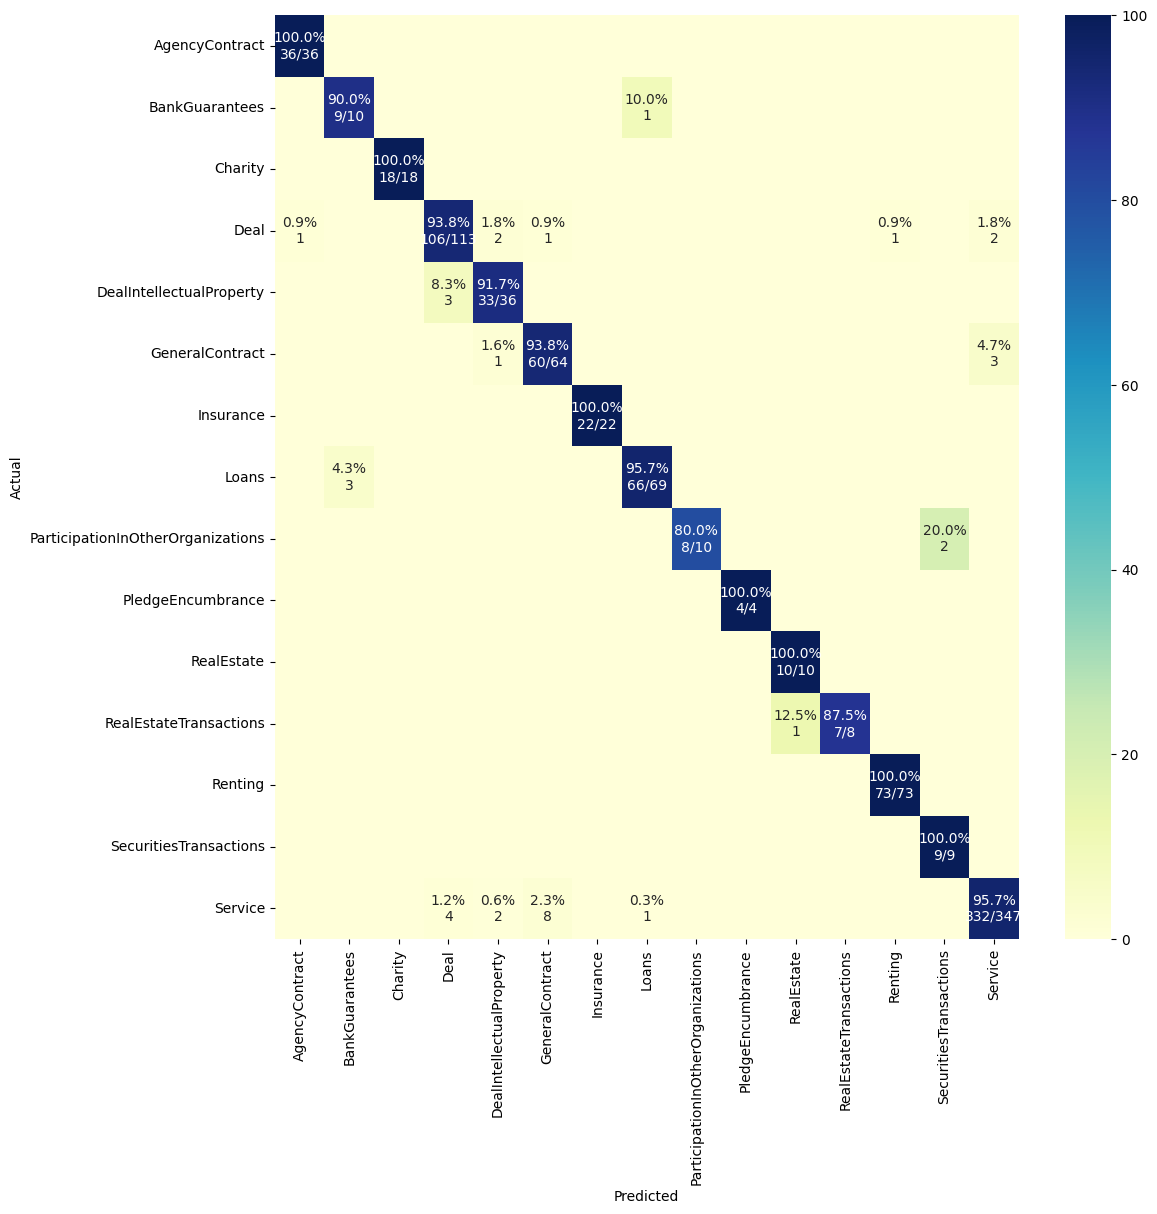

In [75]:
def make_report(umodel, subj_df):
  plot_cm(subj_df.subject_expected.values, subj_df.subject_predicted.values, figsize=(12, 12))
  
  img_path = umtm.reports_dir / f'subjects-confusion-matrix-{umodel.name}.png'
  plt.savefig(img_path, bbox_inches='tight')

  report = classification_report(subj_df.subject_expected, subj_df.subject_predicted, digits=3)
  print(umodel.name)
  print(report)
  
  with open(umtm.reports_dir / f'subjects-classification_report-{umodel.name}.txt', "w") as text_file:
    text_file.write(report)


# subj_df = subj_df[['predicted_subj', 'expected_subj']].copy() #ev[~pd.isna(ev['predicted_subj'])]
make_report(umodel, subj_df)

### f1, subjects
- accuracy                                                   0.953       832
-                         macro avg      0.871     0.893     0.879       832
-                      weighted avg      0.959     0.953     0.955       832

## Single doc eval

In [ ]:
if IN_COLAB:
  !wget https://raw.githubusercontent.com/nemoware/analyser/uber-models/tests/contract_db_1.json

  with open('contract_db_1.json', 'rb') as handle:    
    jdata = json.load(handle, object_hook=json_util.object_hook)

  jdoc = DbJsonDoc(jdata)

else:
  from integration.db import get_mongodb_connection
  from bson.objectid import ObjectId

  def get_doc(objid):
    logger.debug(f'fetching {objid}')
    db = get_mongodb_connection()
    documents_collection = db['documents']
    jdata =  documents_collection.find_one({'_id': ObjectId(objid)})
    return DbJsonDoc(jdata)

  SAMPLE_DOC_ID = counter.most_common()[0][0] #umtm.stats.index[10]
    
    
    
  SAMPLE_DOC_ID = '5eea27adc28b75807f3dae66'
  print('SAMPLE_DOC_ID:', SAMPLE_DOC_ID)
  dp = umtm.make_xyw(SAMPLE_DOC_ID)
  (emb, tok_f), (sm, subj), (sample_weight, subject_weight) = dp

  jdoc = get_doc(SAMPLE_DOC_ID)

In [ ]:
from analyser.legal_docs import embedd_tokens

if IN_COLAB:
  embedder = ElmoEmbedder.get_instance('elmo')  # lazy init
  emb = embedd_tokens(jdoc.get_tokens_for_embedding(),
                             embedder,
                             verbosity=2,
                             log_key='tmp')

  tok_f = get_tokens_features(jdoc.get_tokens_map_unchaged().tokens)

In [ ]:
###############
prediction = umodel.predict(   x=[  np.expand_dims(emb, axis=0), np.expand_dims(tok_f, axis=0)] , batch_size=1)
##############
print(len(prediction), umodel.name)
subj_1hot = prediction[1][0]
print('Subject:', decode_subj_prediction(subj_1hot))


tagging = pd.DataFrame( prediction[0][0], columns=seq_labels_contract)
plot_embedding(tagging, title = f'Predictions of {umodel.name}')

In [ ]:
def render_slices(slices, tokens, attention_v, ht='') -> str:
  ht += '<ol>'
  for _s in slices:
    ht += '<li>'
    t = tokens[_s]
    l = attention_v[_s]
    ht += to_color_text(t, l, _range=(0, 1.2))
    ht += '<br><hr>'
    ht += '</li>'
  ht += '</ol>'

  return ht

for t in seq_labels_contract:
  spans = list( find_top_spans( tagging[t].values, threshold=0.3))  
  display(HTML(render_slices(spans, jdoc.get_tokens_map_unchaged().tokens, tagging[t].values)))


In [ ]:

# mean_ = tagging.values.max(-1)*0.5
# print (mean_.shape)
# display(HTML( to_color_text (jdoc.get_tokens_map_unchaged().tokens[:24000],  mean_[:24000])))

In [ ]:
ids = '5edbadd7da3678279fbcaabf
5edbc660da3678279fbcaeac
5edbc668da3678279fbcaf6e
5edbc65dda3678279fbcae56
5edbc66bda3678279fbcafe6
5edbc615da3678279fbcadc9'